Customer churn is a significant issue for big business companies. Companies are attempting to create methods for predicting customer churn to get a direct impact on getting more revenues, particularly in telecom companies. Finding these characteristics is crucial to ensure appropriate steps can be taken to reduce customer churn.


## Data Understanding
**Classification Label**

- Churn — Whether the customer churned or not (Yes or No)

**Services Each Customer Has to Sign Up**
- PhoneService — Whether the customer has a phone service or not (Yes or No)
- MultipleLines — Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService — A type of internet service the customer has (DSL, Fiber Optic, No)
- OnlineSecurity — Whether the customer has online security or not (Yes, No, No Internet Service)
- OnlineBackup — Whether the customer has online backup or not (Yes, No, No Internet Service)
- DeviceProtection — Whether the customer has device protection or not (Yes, No, No Internet Service)
- TechSupport — Whether the customer has tech support or not (Yes, No, No Internet Service)
- StreamingTV—Whether the customer has a streaming TV (Yes, No, No Internet Service)
- StreamingMovies — Whether the customer has a streaming movie (Yes, No, No Internet Service)

**Customer Account Information**

- Tenure — How long customer has stayed in the company
- Contract — The type of contract the customer has (Month-to-Month, One year, Two years)
- PaperlessBilling — Whether the customer has a paperless billing (Yes, No)
- PaymentMethod — payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges — Amount charged to the customer monthly
- TotalCharges — The total amount charged to the customer

**Customer Demographic Info**

- CustomerID — Unique value for each customer
- gender — The type of gender each customer (Female, Male)
- SeniorCitizen — Whether the customer is a senior citizen (Yes, No)
- Partner — Whether the customer has a partner or not (Yes, No)
- Dependents — Whether the customer has a dependent or not (Yes, No)


In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

In [123]:
DATA_PATH = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"

## Load Data

In [124]:
data = pd.read_csv(DATA_PATH, index_col="customerID")
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [125]:
data.shape

(7043, 20)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [127]:
df_columns = data.columns.to_list()
for col in df_columns:
    print(f"{col} unique values : {data[col].unique()}")

gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']
StreamingMovies unique values : ['No' 'Yes' 'No internet service']
Contract unique values : ['Month-to-month' 'O

## EDA

In [128]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Kita dapat mengabil informasi sebagai berikut :

- SeniorCitizen harusnya data kategori karena nilainya 0 dan 1
- Rata-rata customer bertahan selama 32 bulan (2.6 tahun)
- Rata-rata mereka membayara USD64 dan 25% customer membayar lebih dari USD89



In [129]:
# Change TotalCharges to float
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [130]:
data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [131]:
# Delete "automatic" from PaymentMethod
data["PaymentMethod"] = data["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

In [132]:
# Check missing value
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [133]:
# Drop missing values
data.dropna(inplace=True)

#### Target Variable Visualization


In [134]:
#Apply the ggplot style
plt.style.use("ggplot")

<ipython-input-135-6fe046678bd7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data["Churn"],palette="Blues")


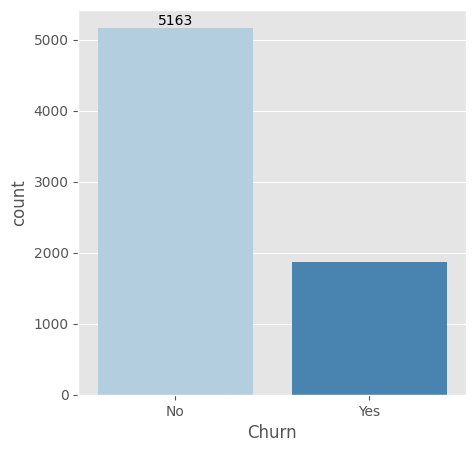

In [135]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = data["Churn"],palette="Blues")
ax.bar_label(ax.containers[0])
plt.show()

Plot batang berikut menunjukkan variabel target churn ya dan tidak. Proporsi churn merupakan kumpulan data yang tidak seimbang karena kedua kelas tidak terdistribusi secara merata. Untuk mengatasinya, pengambilan sampel ulang akan menjadi pendekatan yang cocok. Untuk menyederhanakannya, kami akan menjaga kumpulan data yang tidak seimbang dan menggunakan banyak matriks evaluasi untuk mengevaluasi model

## Categorical vs Target
#### Analysis Services Each Customer


In [136]:
#Make a function to plot categorical data according to target
def plot_categorical_to_target(df,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)

    fig = plt.figure(figsize = (12, 5*number_of_rows))

    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = df, hue = target, palette="Blues")
        ax.set_title(column)
    return plt.show()

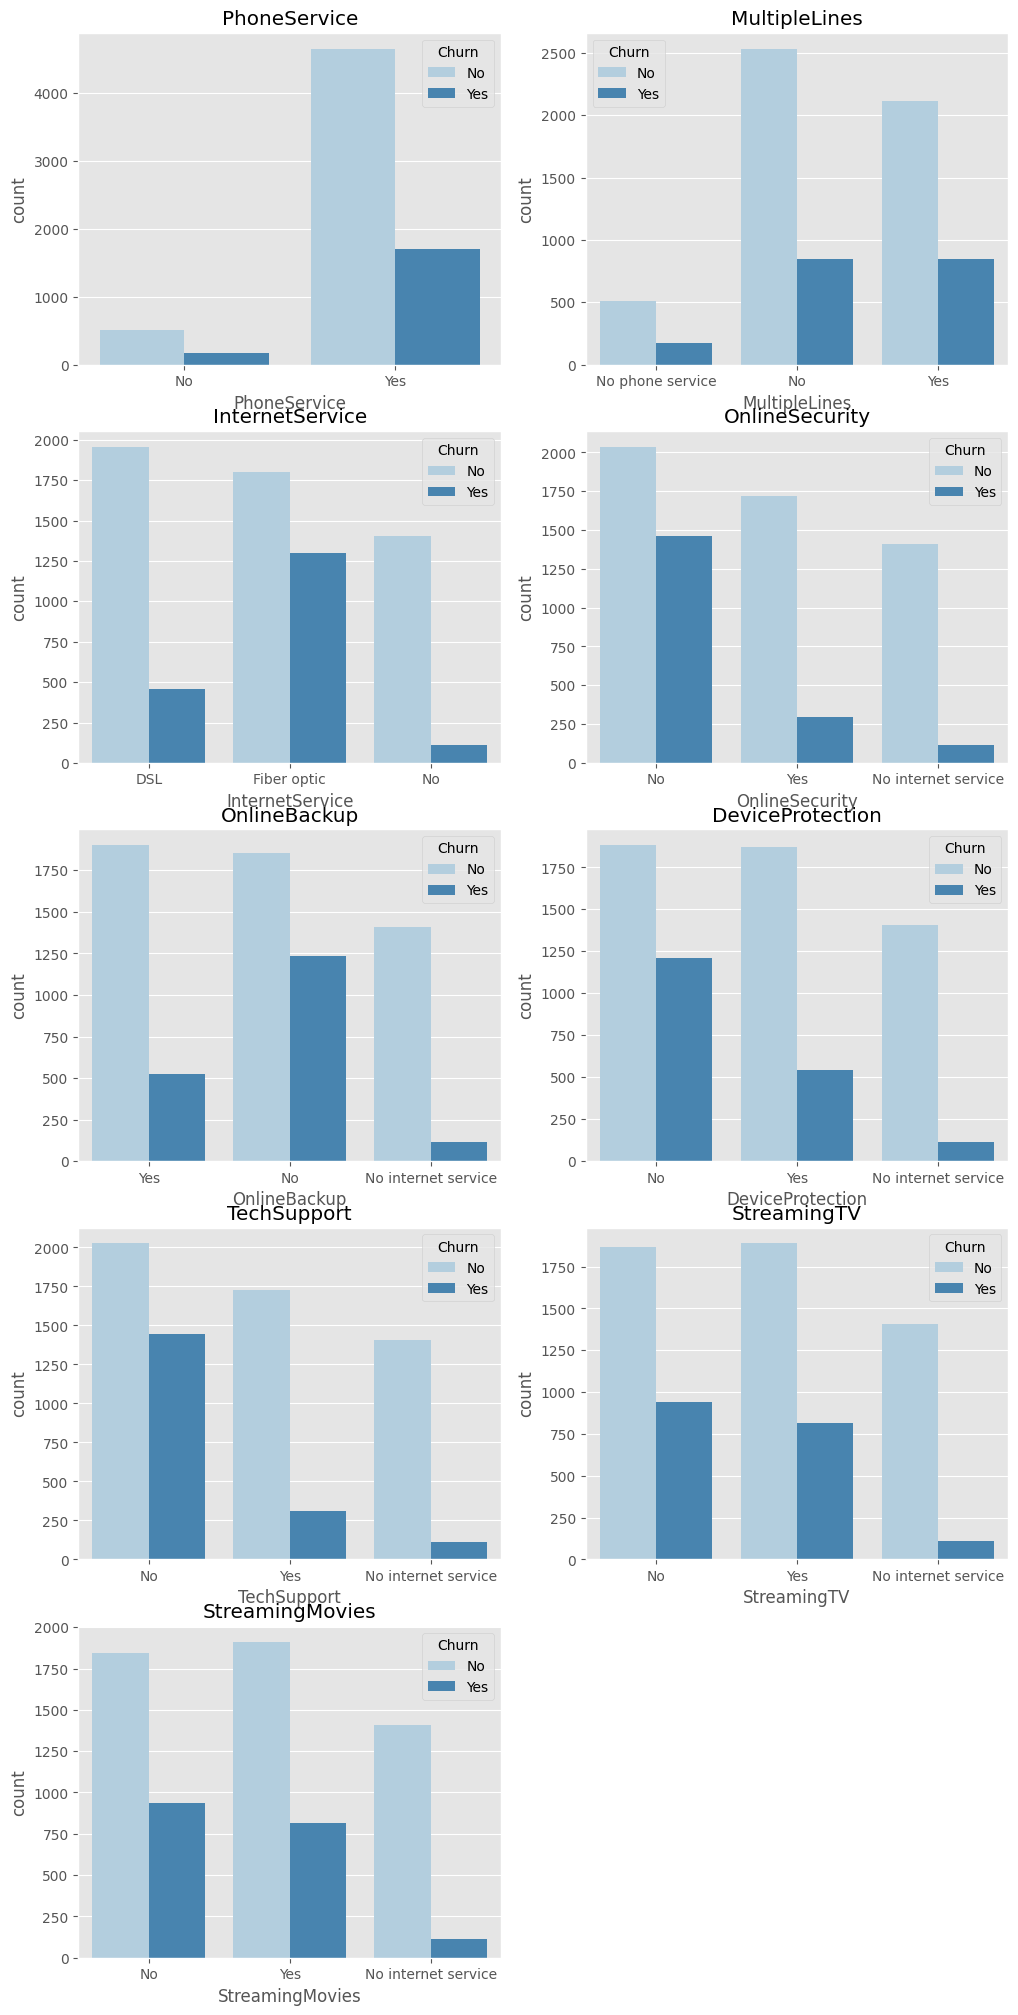

In [137]:
customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_to_target(data,customer_services, "Churn")

Dari plot diatas, bisa kita ambil informasi sebagai berikut:
  - Pelanggan yg tidak memiliki layanan telpon memiliki tingkat churn yang cukup tinggi.
  - Pelanggan yang memilih layanan fiber optic memiliki tingkat churn yg lebih tinggi dibandingkan DSL dan tidak
  - Tingkat churn yang tinggi untuk pelanggan yg tidak memiliki online security
  - Pelanggan yang tidak memiliki akses ke dukungan teknis cenderung lebih sering keluar dibandingkan pelanggan yang memiliki akses.
  - Pelanggan tanpa cadangan online dan perlindungan perangkat memiliki tingkat churn yang lebih tinggi.
----

####  Analysis Customer Account Information


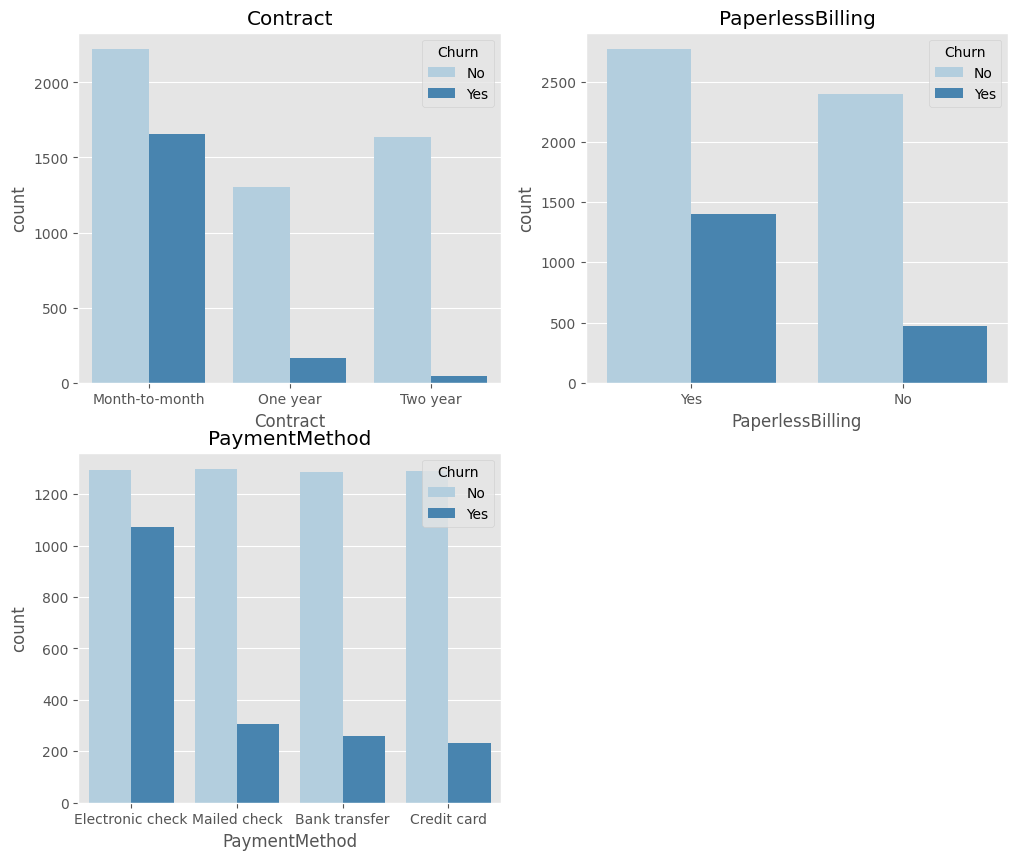

In [138]:
customer_account_cat = ["Contract","PaperlessBilling","PaymentMethod"]
plot_categorical_to_target(data,customer_account_cat,"Churn")

Diagram batang berikut di atas dapat menarik kesimpulan dari hal tersebut:

  - Pelanggan lebih cenderung melakukan churn dengan kontrak bulanan.
  - Tingkat churn yang cukup tinggi dengan metode pembayaran cek elektronik.
  - Pelanggan dengan penagihan tanpa kertas memiliki tingkat churn yang lebih tinggi.

#### Analysis of Customer's Demographic Info


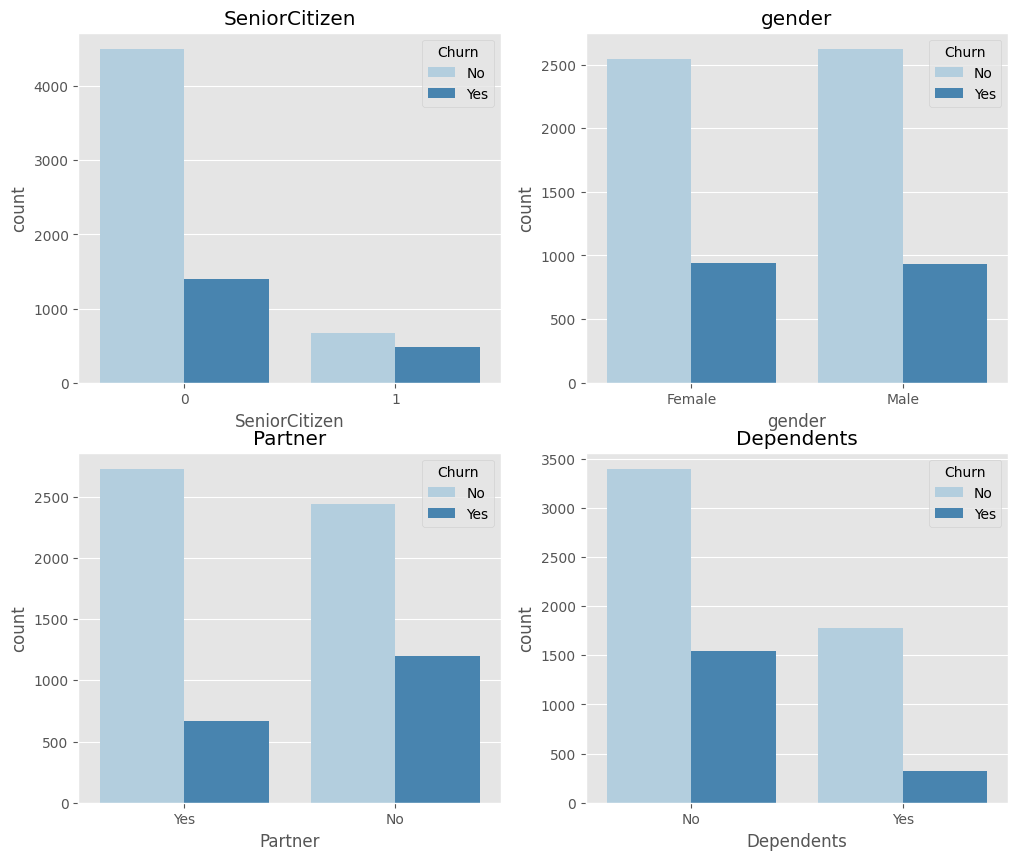

In [139]:
customer_account_cat = ["SeniorCitizen","gender","Partner", "Dependents"]
plot_categorical_to_target(data,customer_account_cat,"Churn")

Berikut bar plot diatas dapat kita tarik beberapa kesimpulan :
  - Churn dan tidak churn  memiliki perbedaan pada setiap gender.
  - Pelanggan muda lebih cenderung melakukan churn dibandingkan pelanggan lama.
  - Pelanggan dengan partners lebih sedikit churn jika dibandingkan dengan mitra.


## Numeric vs Target


In [140]:
def histogram_plots(df, numerical_variable, target):
    number_of_col = 2
    number_of_row = math.ceil(len(numerical_variable)/2)

    fig = plt.figure(figsize=(12, 5*number_of_row))

    for index, column in enumerate(numerical_variable, 1):
        ax = fig.add_subplot(number_of_row, number_of_col, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"], fill=True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill=True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    plt.savefig("numerical_variables.png", dpi=300)
    return plt.show()


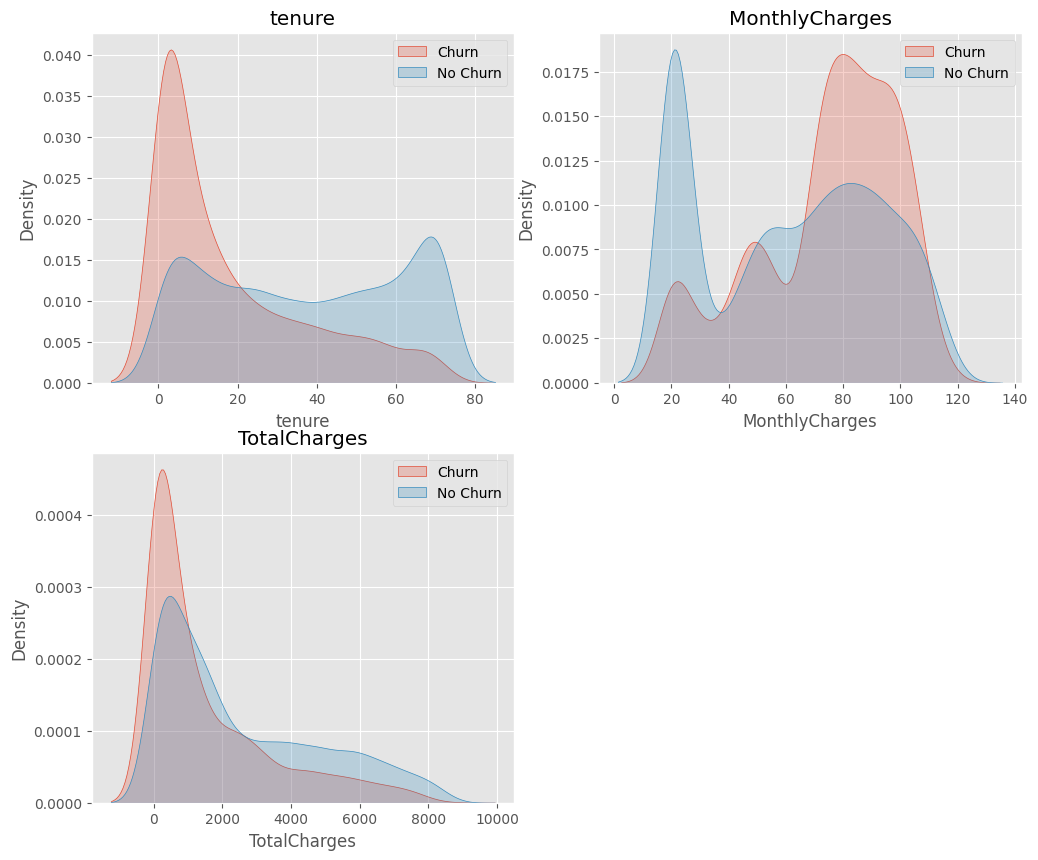

In [141]:
customer_account_num = ["tenure", "MonthlyCharges","TotalCharges"]
histogram_plots(data,customer_account_num, "Churn")


Berdasarkan histogram diatas dapat kita peroleh kesimpulan bahwa:

  - Pelanggan dengan masa kerja yang pendek lebih banyak yang churn.
  - Pelanggan yang membayar lebih banyak untuk biaya bulanan memiliki tingkat churn yang lebih tinggi.
  - Pelanggan dengan total biaya rendah cenderung melakukan churn.

In [142]:
data["TotalCharges"].mean()

2283.300440841866

## Detect Outlier


In [143]:
def outlier_check_boxplot(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)

    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = df)
        ax.set_title(column)
    plt.savefig("Outliers_check.png", dpi=300)
    return plt.show()

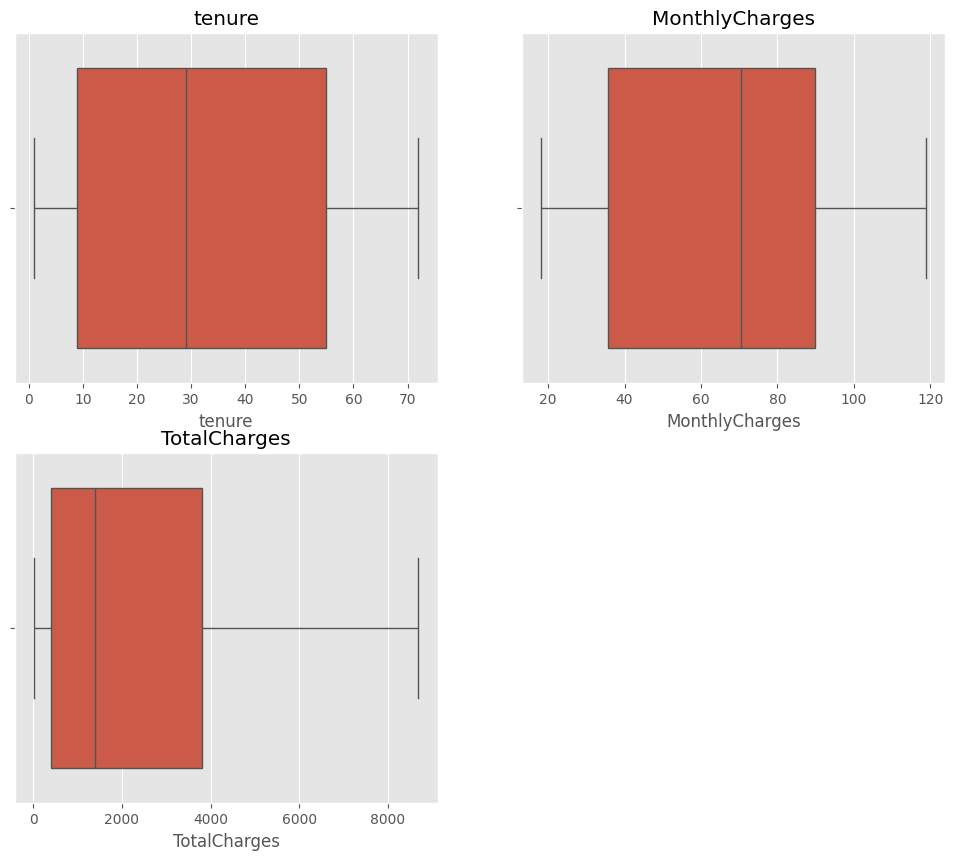

In [144]:
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(data,numerical_values)

From boxplots, we can take a conclusion that each numerical variable doesn’t have an outlier.

## Feature Engineering
#### Label Encoding


In [145]:
feature_le = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

data = label_encoding(data,feature_le)
data["gender"] = data["gender"].map({"Female":1, "Male":0})

#### One Hot Encoding

In [146]:
features_ohe = [
    "MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
    "Contract","PaymentMethod"]
df_ohe = pd.get_dummies(data, columns=features_ohe)

#### Feature Scaling

In [147]:
features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

In [148]:
df.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.000000,0.115423,0.001275,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,0.464789,0.385075,0.215867,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,0.014085,0.354229,0.010310,0,0,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,0.619718,0.239303,0.210241,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
9237-HQITU,0.014085,0.521891,0.015330,1,0,0,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0


#### Correlation Analysis

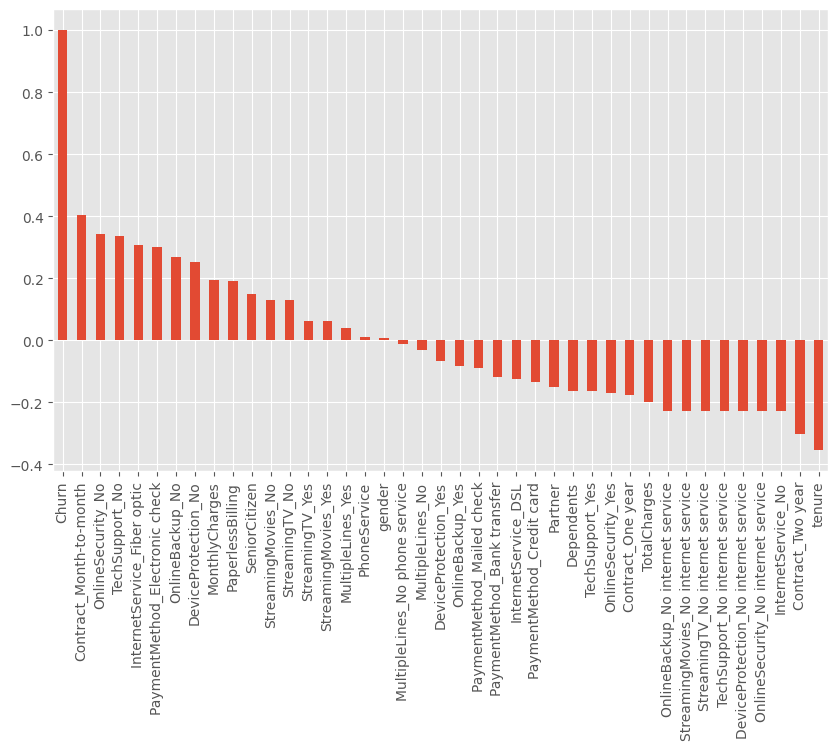

In [149]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.savefig("correlation.png", dpi=300)
plt.show()

Korelasi adalah metode statistik untuk menguji hubungan antara variabel numerik atau kategori. Berikut plot di atas untuk mengetahui korelasi beberapa variabel terhadap churn variabel target. Korelasi yang paling tinggi adalah variabel Contract_Month-to-month sehingga variabel tersebut sangat berhubungan dengan churn rate. Tenure memiliki korelasi negatif dengan churn sehingga nilai tenurial yang lebih tinggi menyebabkan churn yang lebih rendah.

## Train-Test Split

In [150]:
X = df.drop(columns = "Churn")
y = df.Churn

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5274, 40), (1758, 40), (5274,), (1758,))

## Model Selection & Evaluation Model
### Model Selection
- K-Nearest Neighbors — cepat, mudah, dan berbasis instance
- Regresi Logistik - Model linier ini
- Neural Network — Lebih rumit seperti neuron di otak manusia.

### Metrics
- Feature Weight — Buat daftar bobot fitur teratas untuk membuat prediksi. Bobot fitur digunakan untuk model **regresi logistik**
- Confusion Matrix — Menampilkan nilai benar dan salah, lalu membandingkannya dengan prediksi dan nilai sebenarnya.
- Accuracy — Menampilkan model akurasi dari pelatihan dan pengujian untuk mengukur apakah suatu model cocok untuk prediksi.
- Curve ROC — Menampilkan kurva True Positive Rate (TPR) terhadap False Positive Rate (FPR) untuk ambang batas yang berbeda dan kurva ROC digunakan untuk model pembelajaran mesin diagnostik.
- AUC (untuk ROC) — Area Under Curve (AUC) digunakan untuk menghitung luas Kurva ROC dan peningkatan luas akan lebih baik untuk model.
- Precission-Recal-curve — Menampilkan kurva untuk membandingkan Tingkat Positif Palsu (FPR) dan Tingkat Negatif Palsu (FNR) untuk ambang batas yang berbeda dan metrik ini digunakan untuk menunjukkan kemampuan model diagnostik. Metrik ini cocok **untuk kumpulan data target yang tidak seimbang** karena fokus pada presisi dan perolehan kembali serta tidak bergantung pada jumlah negatif sebenarnya.
- Skor F1 — Metrik ini biasanya lebih baik dalam hal akurasi, terutama jika metrik ini memiliki distribusi target kumpulan data yang tidak seimbang.
- AUC (untuk RRC) — Mengukur keseluruhan area di bawah kurva RRC.

In [151]:
# For logistic Regression
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index = X_df.columns.values).sort_values(ascending=False)

    top_10_weights = weights[:10]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Top 10 Features")
    top_10_weights.plot(kind="bar")

    bottom_10_weights = weights[len(weights)-10:]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Bottom 10 Features")
    bottom_10_weights.plot(kind="bar")
    print("")


def confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred, classifier, classifier_name):
    cm = confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot()
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.show()

    print(f"Accuracy Score Test = {accuracy_score(y_pred,y_test)}")
    print(f"Accuracy Score Train = {classifier.score(X_train,y_train)}")
    return print("\n")

def roc_curve_auc_score(X_test, y_test, y_pred_probabilities,classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr,tpr,label=f"{classifier_name}")
    plt.title(f"{classifier_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    return print(f"AUC Score (ROC):{roc_auc_score(y_test,y_pred_prob)}")

def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall,precision, label=f"{classifier_name}")
    plt.title(f"{classifier_name}-ROC Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
    f1_score_result, auc_score = f1_score(y_test,y_pred), auc(recall,precision)
    return print(f"f1 Score : {f1_score_result} \n AUC Score (PR) : {auc_score}")

## K-NN

In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)

In [153]:
y_pred_knn_proba

array([[0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       ...,
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4]])

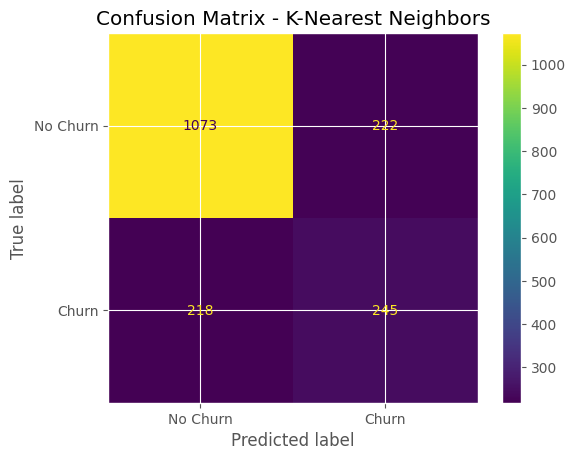

Accuracy Score Test = 0.7497155858930603
Accuracy Score Train = 0.8361774744027304




In [154]:
confusion_matrix_plot(X_train,y_train,X_test, y_test, y_pred_knn, knn, "K-Nearest Neighbors")

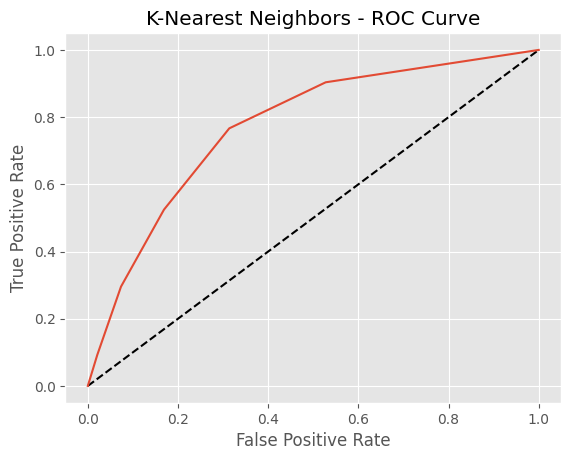

AUC Score (ROC):0.7720298823845533


In [155]:
roc_curve_auc_score(X_test,y_test,y_pred_knn_proba, "K-Nearest Neighbors")

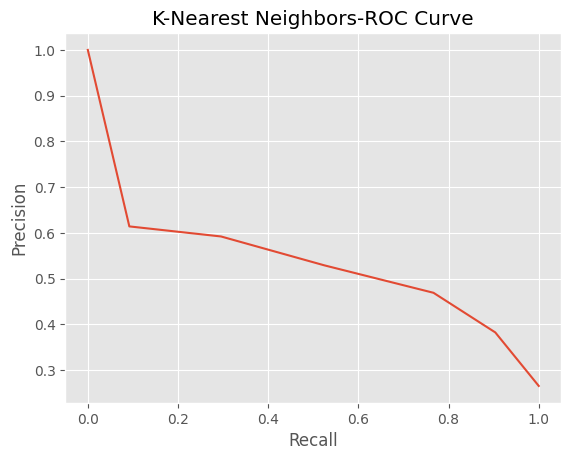

f1 Score : 0.5268817204301075 
 AUC Score (PR) : 0.5359000506150117


In [156]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_knn,y_pred_knn_proba,"K-Nearest Neighbors")

## Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_proba = logreg.predict_proba(X_test)

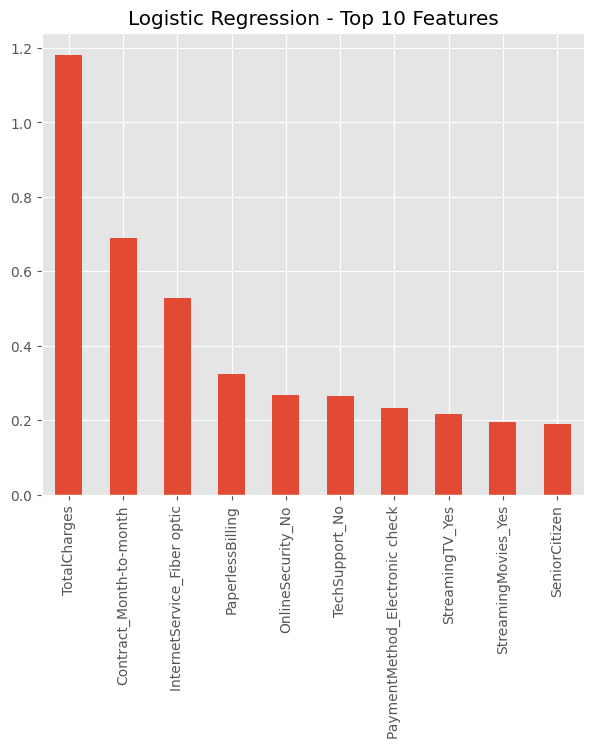

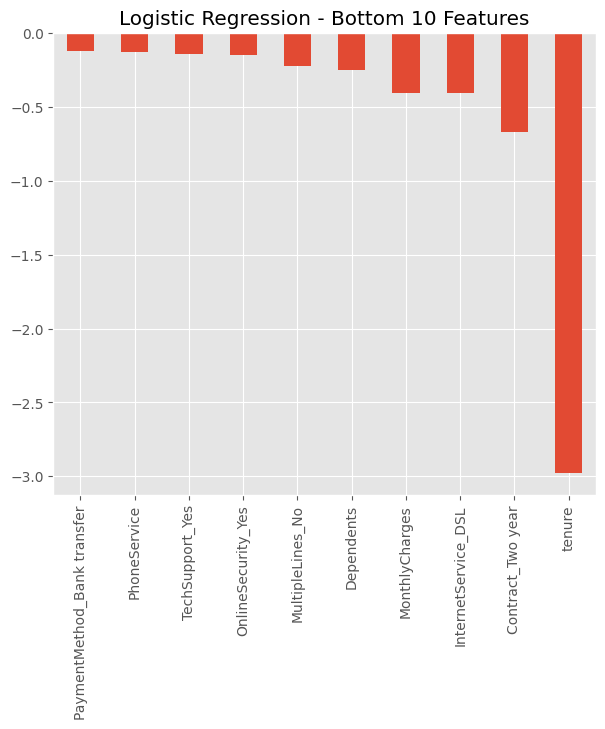

In [158]:
feature_weights(X_train,logreg,"Logistic Regression")

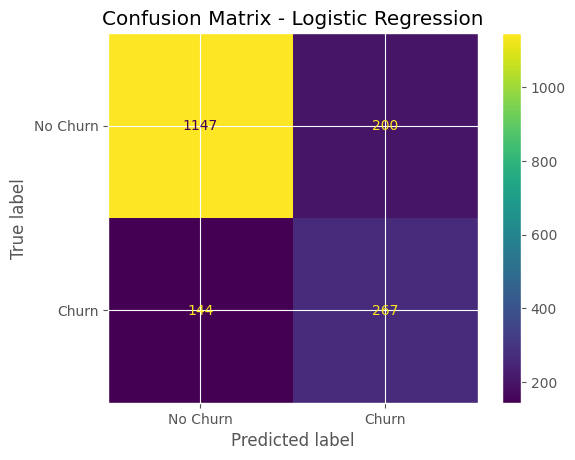

Accuracy Score Test = 0.8043230944254836
Accuracy Score Train = 0.8037542662116041




In [159]:
confusion_matrix_plot(X_train,y_train,X_test,y_test, y_pred_logreg,logreg,"Logistic Regression")

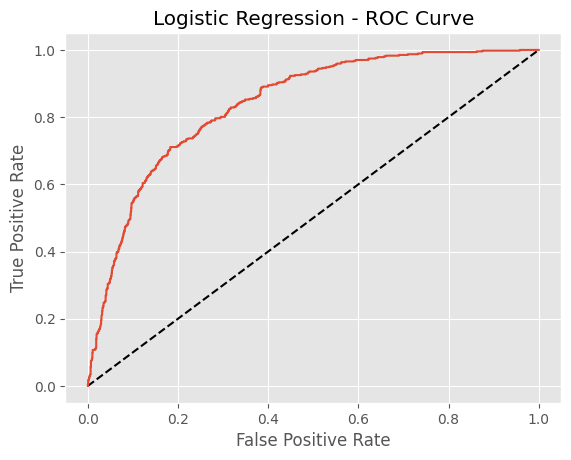

AUC Score (ROC):0.839213829227878


In [160]:
roc_curve_auc_score(X_test,y_test,y_pred_logreg_proba, "Logistic Regression")

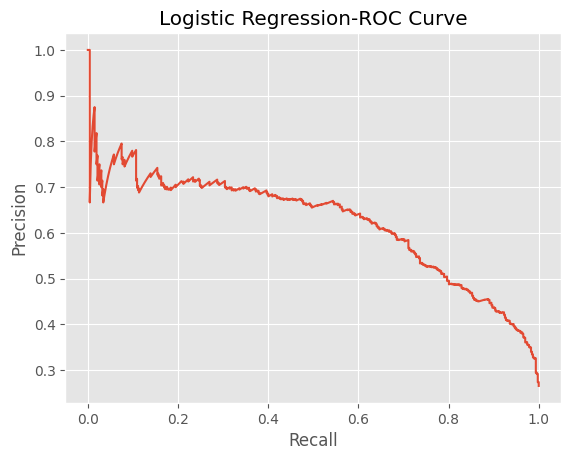

f1 Score : 0.5268817204301075 
 AUC Score (PR) : 0.6215269094030665


In [161]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_knn,y_pred_logreg_proba,"Logistic Regression")

## Neural Network

In [162]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [163]:
# NN Model Parameter
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.0001

In [164]:
class TrainDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    def __len__(self):
        return len(self.X)


class TestDataset(Dataset):
    def __init__(self, X):
        self.X = X
    def __getitem__(self, index):
        return self.X[index]
    def __len__(self):
        return len(self.X)

In [165]:
#creates train data and test data
train_data = TrainDataset(torch.FloatTensor(X_train.to_numpy()),
                      torch.FloatTensor(y_train.to_numpy()))
test_data = TestDataset(torch.FloatTensor(X_test.to_numpy()))


In [166]:
trainLoader = DataLoader(train_data, batch_size=BATCH_SIZE, num_workers=2)
testLoader = DataLoader(test_data, num_workers=1)

In [167]:
# Model
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        self.layer_1 = nn.Linear(in_features=X_train.shape[1], out_features=64)
        self.layer_2 = nn.Linear(in_features=X_train.shape[1], out_features=128)
        self.output = nn.Linear(128, 1)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(inputs))
        x = self.dropout(x)
        x = self.output(x)
        return x

In [168]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [169]:
model = BinaryClassification()
model.to(device)

print(model)
#Define loss function and optimizer

BinaryClassification(
  (layer_1): Linear(in_features=40, out_features=64, bias=True)
  (layer_2): Linear(in_features=40, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)


In [170]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE)

In [171]:
## Create a function for calculate accuracy
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum / y_test.shape[0]
    acc = torch.round(acc * 100)
    return acc

In [172]:
#Training the neural network model
for epoch in range(EPOCHS):
    for X_train, y_train in trainLoader:
        X_train, y_train = X_train.to(device), y_train.to(device)
        #Feed Forward
        y_pred = model(X_train)
        #Calculate Loss
        loss = loss_fn(y_pred,y_train.unsqueeze(1))
        acc = binary_acc(y_pred, y_train.unsqueeze(1))
        #Optimizer zero grad
        optimizer.zero_grad()
        #Loss Backward
        loss.backward()
        #Optimizer step
        optimizer.step()
    print(f"Epoch : {epoch} | loss : {loss:.3f} | acc : {acc}")

Epoch : 0 | loss : 0.621 | acc : 81.0
Epoch : 1 | loss : 0.530 | acc : 81.0
Epoch : 2 | loss : 0.470 | acc : 81.0
Epoch : 3 | loss : 0.427 | acc : 81.0
Epoch : 4 | loss : 0.418 | acc : 81.0
Epoch : 5 | loss : 0.386 | acc : 81.0
Epoch : 6 | loss : 0.384 | acc : 81.0
Epoch : 7 | loss : 0.346 | acc : 88.0
Epoch : 8 | loss : 0.351 | acc : 85.0
Epoch : 9 | loss : 0.359 | acc : 85.0
Epoch : 10 | loss : 0.369 | acc : 81.0
Epoch : 11 | loss : 0.351 | acc : 81.0
Epoch : 12 | loss : 0.351 | acc : 85.0
Epoch : 13 | loss : 0.349 | acc : 85.0
Epoch : 14 | loss : 0.344 | acc : 85.0
Epoch : 15 | loss : 0.336 | acc : 81.0
Epoch : 16 | loss : 0.334 | acc : 85.0
Epoch : 17 | loss : 0.351 | acc : 85.0
Epoch : 18 | loss : 0.311 | acc : 85.0
Epoch : 19 | loss : 0.332 | acc : 85.0
Epoch : 20 | loss : 0.333 | acc : 81.0
Epoch : 21 | loss : 0.331 | acc : 85.0
Epoch : 22 | loss : 0.344 | acc : 81.0
Epoch : 23 | loss : 0.322 | acc : 81.0
Epoch : 24 | loss : 0.321 | acc : 85.0
Epoch : 25 | loss : 0.315 | acc : 8

In [173]:
#Testing the neural network model
y_pred_list = []
model.eval()
with torch.inference_mode():
    for X_test in testLoader:
        X_test = X_test.to(device)
        y_test_pred = model(X_test)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_test_pred = torch.round(y_test_pred)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze() for a in y_pred_list]

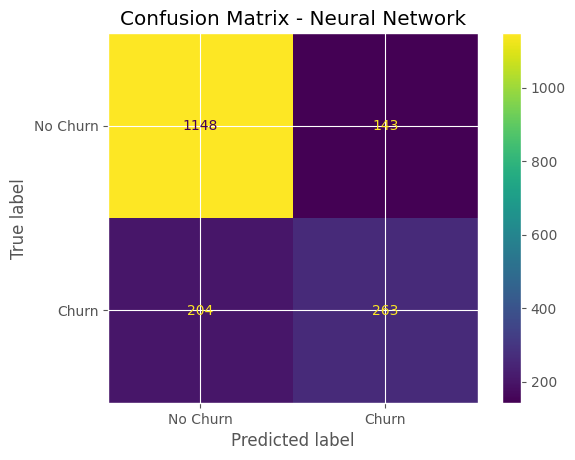

Accuracy Score : 0.8026166097838453


In [174]:
#Display confusion matrix
cm = confusion_matrix(y_test,y_pred_list)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["No Churn", "Churn"])
display.plot()
plt.title("Confusion Matrix - Neural Network")
plt.show()
print(f"Accuracy Score : {accuracy_score(y_test, y_pred_list)}")

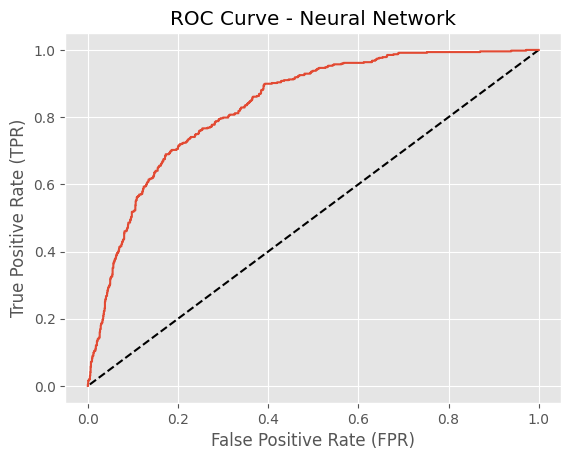

ROC Score = 0.834869803631466


In [177]:
y_pred_probs = []
with torch.inference_mode():
    for X_test in testLoader:
        X_test = X_test.to(device)
        logits = model(X_test)
        y_pred_proba = torch.sigmoid(logits)
        y_pred_probs.append(y_pred_proba.cpu().numpy())
y_pred_prob = np.array(y_pred_probs).reshape(-1)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([1,0],[1,0], "k--")
plt.plot(fpr,tpr)
plt.title("ROC Curve - Neural Network")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()
print(f"ROC Score = {roc_auc_score(y_test, y_pred_prob)}")

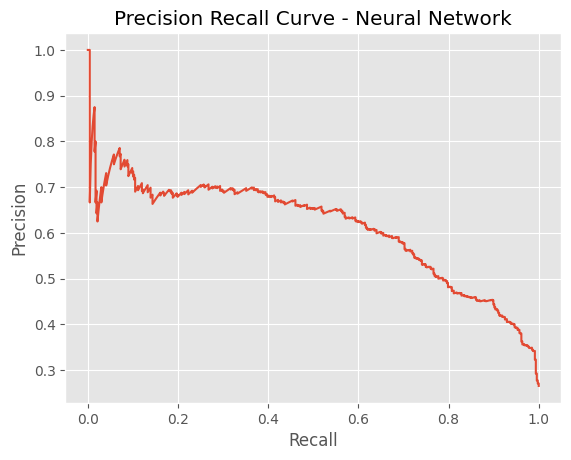

F1 Score : 0.602520045819015
AUC (PRC) : 0.6109231923012161


In [178]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve - Neural Network")
plt.show()
print(f"F1 Score : {f1_score(y_test, y_pred_list)}")
print(f"AUC (PRC) : {auc(recall, precision)}")

# Experiment pake pipeline scikit